# Ejercicio KNN (K-Nearest Neighbor)

## Armando Misael Miranda Hernandez

Importamos las librerias para manejo de datos, graficas y el algoritmo en general

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Si la lectura del archivo csv de entrada con pandas. Este CSV ua separador de punto y coma.

In [2]:
dataframe = pd.read_csv('reviews_sentiment.csv',sep=';')
dataframe.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


In [3]:
# Se revisa el resumen estadistico de los datos
dataframe.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


257 registros. Las estrellas de 1 a 5. La cantidad de palabras va desde 1 sola hasta 103. Las valoraciones de sentimiento estan entre -2.27 y 3.26 con una media 0.38 y a partir de la desviacion estandar se puede observar que la mayoria entre 0.38 - 0.89

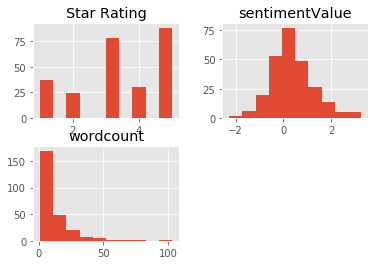

In [4]:
dataframe.hist()
plt.show()

In [5]:
print(dataframe.groupby('Star Rating').size())

Star Rating
1    37
2    24
3    78
4    30
5    88
dtype: int64


C:\Users\user\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


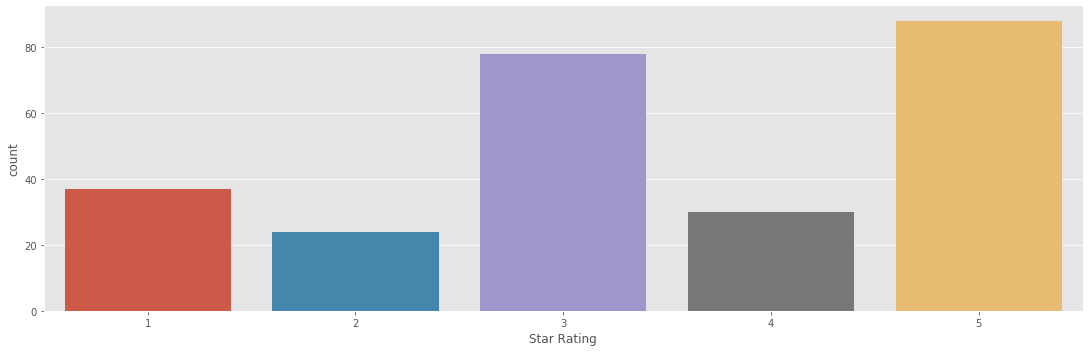

In [6]:
sb.factorplot('Star Rating',data=dataframe,kind='count',aspect=3)

Graficamos la cantidad de palabras y se confirma que la mayoria esta entre 1 y 10 palabras

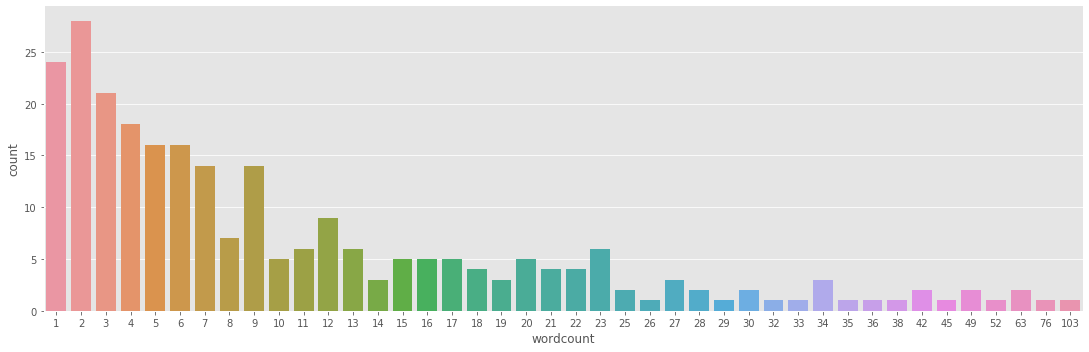

In [7]:
sb.factorplot('wordcount',data=dataframe,kind='count',aspect=3)

Se prepara al conjunto de datos, generamos X y Y de entrada y los conjuntos de entrenamiento y prueba"

In [8]:
x = dataframe[['wordcount','sentimentValue']].values
y = dataframe['Star Rating'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
scaler= MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Se utiliza KKN con Scikit Learn. Se define el valor de K en 7 y se crea el clasificador

In [9]:
n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)
print('Precision de KNN en los datos de entrenamiento: {:.2f}'
     .format(knn.score(x_train,y_train)))
print('Precion de KNN en el conjunto de pruebas: {:.2f}'
     .format(knn.score(x_test,y_test)))

Precision de KNN en los datos de entrenamiento: 0.90
Precion de KNN en el conjunto de pruebas: 0.86


#### Nota: Se utiliza la clase KNeighborsClassifier de Scikit Learn ya que las etiquetas son valores discretos (estrellas del 1 al 5). Pero se debe tomar en cuenta que existe la clase KNeighborRegressor para etiquetas con valores continuos

#### Precision del modelo. Se confirma la precision viendo la matrix de confusion y el reporte de conjunto de pruebas. Detallando aciertos y fallos 

In [10]:
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65

